# **Analysis of 911 Calls in Montgomery County, PA**

Analysis and visualization of data on the 911 emergency calls in Montgomery County, PA from December 2015 to August 2016. Dataset found on __[Kaggle](https://www.kaggle.com/mchirico/montcoalert)__

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [35]:
sns.set_style('whitegrid')
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['axes.titleweight'] = 'bold'
%matplotlib inline


Below is the loaded data from the Kaggle csv file. The 'timeStamp' column was converted into an appropriate datetime format. 

In [10]:
df = pd.read_csv('911.csv')
df['timeStamp']=pd.to_datetime(df['timeStamp'])

## Data Exploration
After loading our data, all of the necessary packages and setting our parameters, 
it is important to explore the basics of our dataset, as it is done below:

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null datetime64[ns]
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 6.8+ MB


In [16]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


The following three lines of code give us the top 5 zipcodes, Townships, and a number of unique call titles, respectively. 

In [14]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [15]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [16]:
df['title'].nunique()

110




## Data Cleaning
To be able to dig deeper into our dataset, the data must be cleaned and some new variables should be created. 





A custom function is created to clean the 'title' column and convert it into 'Reason' column, as shown below:

In [18]:

def clean(column):
    cleaned=[]
    for word in column:
        clword=word.split(':')[0]
        cleaned.append(clword)
    return pd.Series(cleaned)
   
         
#lambda function alternative #df['Reason']=df['title']. apply(lambda x:x.split(':')[0])        


In [19]:
df['Reason']=clean(df['title'])

## Data Visualization
Presented in this section is a brief description and visualization of some of the information that can be extracted from the data:

Using value_counts method, we determine the most common reasons for a 911 call. 

In [46]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

To get a better sense of the nature of the calls, we create a bar chart to visualize our findings above.

Text(0.5, 1.0, 'Reasons for 911 Call per Day of Week')

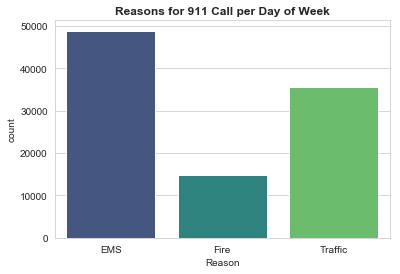

In [47]:
sns.countplot(x='Reason',data=df, palette = 'viridis').set_title('Reasons for 911 Call per Day of Week', 
                                                               fontdict={'fontsize': 'larger',
                                                                 'fontweight':'bold'})


#### *Cleaning up 'timeStamp' column*
To get a deeper understanding, we try to model the behavior of the data on an hourly, daily, and monthly basis. From the 'timeStamp' column, four new columns were created:
 - df['Hour'] contains the hour attribute of each call entry (integer value from 0 to 23), which was derived using the hour() method.
 - df['Month'] contains the month attribute of each call entry (integer value from 1 to 12), which was derived using the month() method.
 - df['Date'] contains the date attribute of each call entry (integer value from 1 to 31), which was derived using the date() method.      
 - df['Day of week'] contains the day of the week attribute of each call entry (integer value from 0 to 6), which was derived using the dayofweek() method.
    *  to convert integer values into actual string names for each date of the week, a dictionary of the integer values and their corresponding string names was created and mapped onto the df['Day of Week'] via the map() method.
       

In [61]:
df['Hour'] = df['timeStamp']. apply(lambda x:x.hour)
df['Month'] = df['timeStamp']. apply(lambda x:x.month)
df['Date']=df['timeStamp'].apply(lambda x:x.date())
df['Day of Week'] = df['timeStamp']. apply(lambda x:x.dayofweek)

In [62]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [63]:
df['Day of Week']= df['Day of Week'].map(dmap)

The information above is then presented in bar charts below. The first chart gives us the aggregate count of each of the three types of emergency calls made per day of the week. Second chart gives us the aggregate of the same three types of calls but on a monthly basis.  

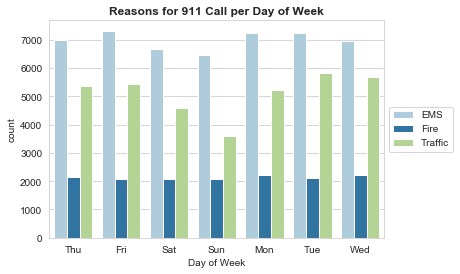

In [64]:

sns.countplot(x='Day of Week',data=df, hue='Reason', palette = 'Paired').set_title('Reasons for 911 Call per Day of Week', 
                                                               fontdict={'fontsize': 'larger',
                                                                 'fontweight':'bold'})
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#plt.title('Reasons for 911 Call per Day of Week', fontdict={'fontsize': 'larger','fontweight':'bold'})

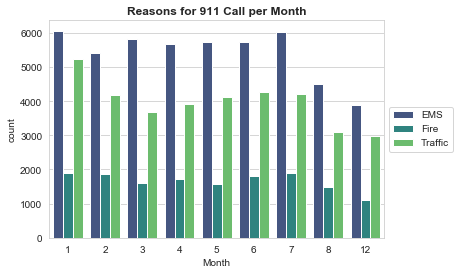

In [65]:
sns.countplot(x='Month',data=df, hue='Reason', palette = 'viridis').set_title('Reasons for 911 Call per Month', 
                                                               fontdict={'fontsize': 'larger',
                                                                 'fontweight':'bold'})
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


As it is evident from the plot above, some months are missing. To address this issue, we must plot the information in another way. We start with a simple line plot. To do so we create an object called byMonth, where the DataFrame is grouped by the month column and the count() method is used for aggregation purposes.

In [66]:
byMonth = df.groupby('Month').count()

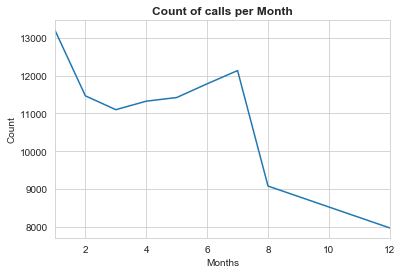

In [67]:
byMonth['title'].plot.line()
plt.title('Count of calls per Month', fontdict={'fontsize': 'larger','fontweight':'bold'} )
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()

#### *Linear Regression* 
To assess the linear relationship between the number of 911 calls and the month variable, we use the .lmplot method to create a linear fit on the number of calls per month. 

/Users/vlad/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Count of Calls per Month w/ Linear Fit')

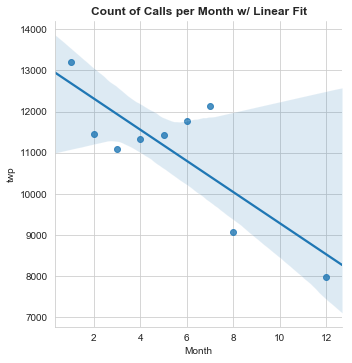

In [68]:
sns.lmplot(x='Month',y='twp', data=byMonth.reset_index())
plt.title('Count of Calls per Month w/ Linear Fit', fontdict={'fontsize': 'larger','fontweight':'bold'} )


#### *Line Plots*
The line plots presented below give us broader understanding the behavior of our data by showing us the changes in the total number of 911 calls per day from December 2015 to August 2016.

In [69]:
byDate = df.groupby('Date').count()

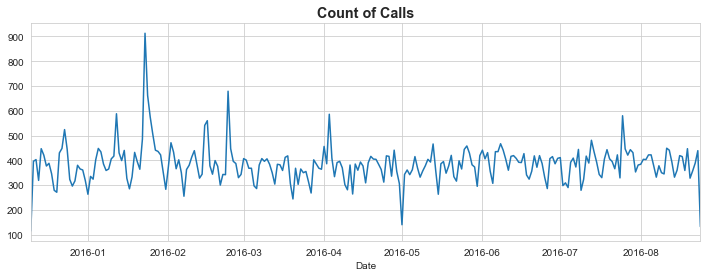

In [70]:
byDate['title'].plot.line(figsize=(12,4))
plt.title('Count of Calls')
plt.show()


Likewise, lineplots for each call category are created in order to give us an insight of the changes in emergency calls per category. Per our data, although there is a huge spike in traffic related calls around the end of January 2016, the most common 911 calls from Dec 2015 and August 2016 were EMS related.  

In [71]:
byTraffic = df[df['Reason']=='Traffic'].groupby('Date').count()

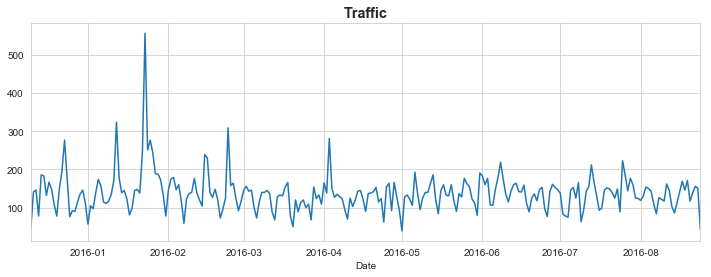

In [72]:
byTraffic['title'].plot.line(figsize=(12,4))
plt.title('Traffic')
plt.show()

In [73]:
byEMS = df[df['Reason']=='EMS'].groupby('Date').count()

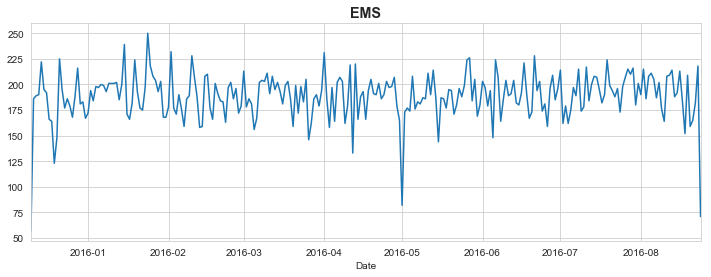

In [74]:
byEMS['title'].plot.line(figsize=(12,4))
plt.title('EMS')
plt.show()

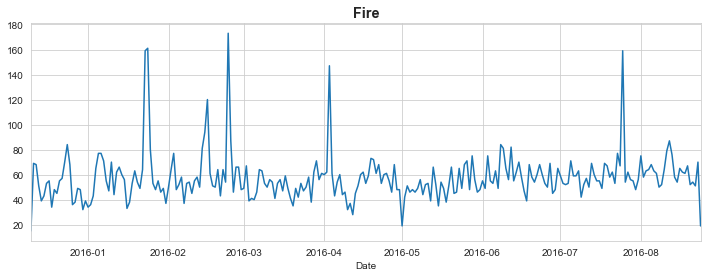

In [75]:
byFire=df[df['Reason']=='Fire'].groupby('Date').count()
byFire['title'].plot.line(figsize=(12,4))
plt.title('Fire')
plt.show()

#### *Heatmaps and Clustermaps*
Another great way of visualizing the data is through the use of heatmaps and hierarchically-clustered heatmaps called clustermaps. Prior  to plotting the data, our dataframe needs to be transformed into a matrix format, where days of the week are the indeces (integer values from 0 to 6) and the columns values are  hours (integer values from 0 to 23). 

In [25]:
dfrearr = df.groupby(['Day of Week','Hour']).count()['Reason'].unstack()
dfrearr

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
0,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
1,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
2,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335
3,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
4,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
5,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
6,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330


With the data arranged into a proper format, we create our heatmap and clustermap of 911 calls per hour of each day of the week

Text(0.5, 1.0, 'Heatmap of 911 Calls per Hour per Day')

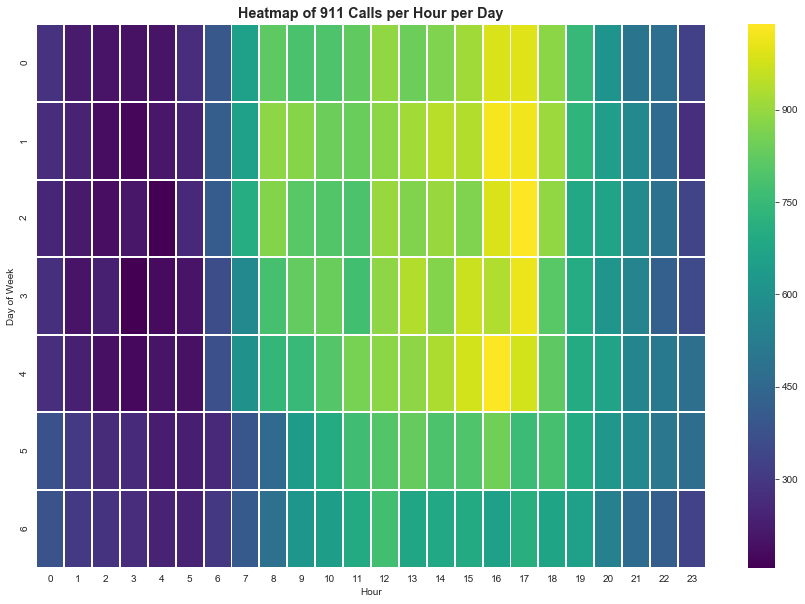

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(dfrearr,cmap='viridis',linecolor='white',linewidths=1)
plt.title('Heatmap of 911 Calls per Hour per Day')

Text(0.5, 1.0, 'Clustermap of 911 Calls per Day')

<Figure size 1080x1080 with 0 Axes>

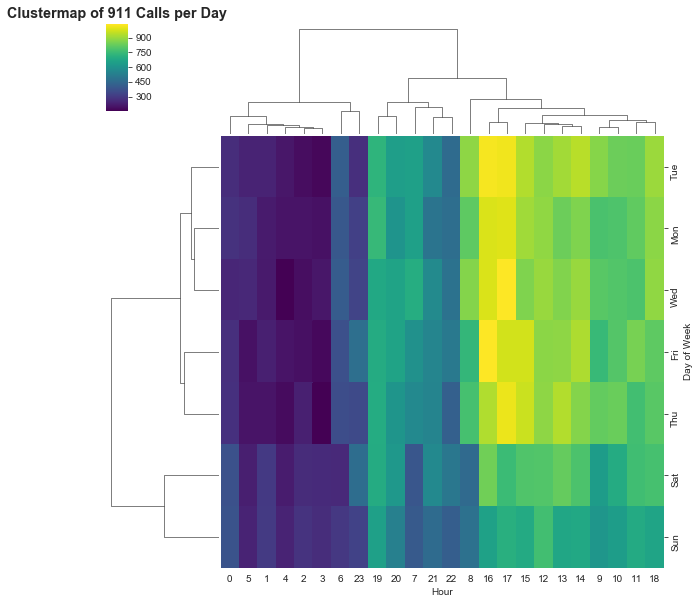

In [131]:
plt.figure(figsize=(15,15))
sns.clustermap(dfrearr,cmap='viridis')
plt.title('Clustermap of 911 Calls per Hour per Day')

To determine the busiest days of each month, we create another clustermap and heatmap combination that shows the 911 calls made each day of every month. 

In [76]:
dfrearr2 = df.groupby(['Day of Week','Month']).count()['Reason'].unstack()

Text(0.5, 1.0, 'Heatmap of 911 Calls per Day per Month')

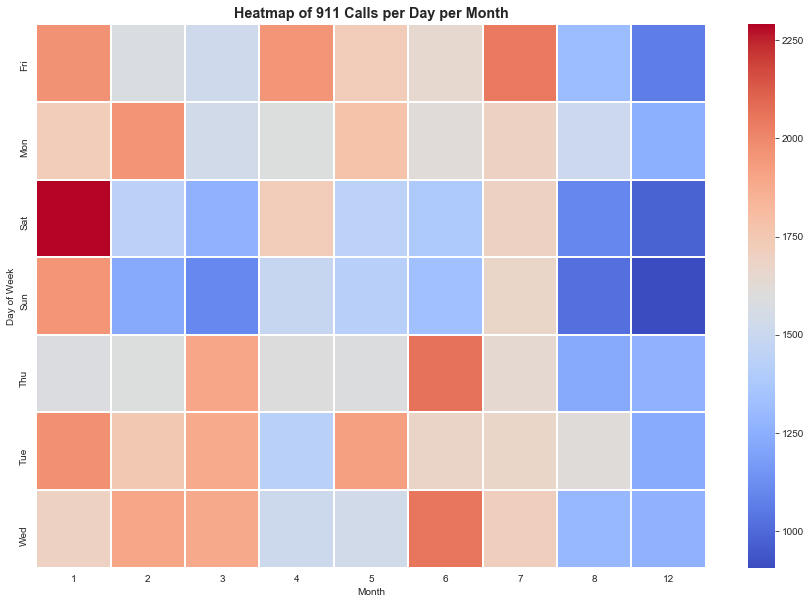

In [77]:
plt.figure(figsize=(15,10))
sns.heatmap(dfrearr2,cmap='coolwarm',linecolor='white',linewidths=1)
plt.title('Heatmap of 911 Calls per Day per Month')

Text(0.5, 1.0, 'Clustermap of 911 Calls per Day per Month')

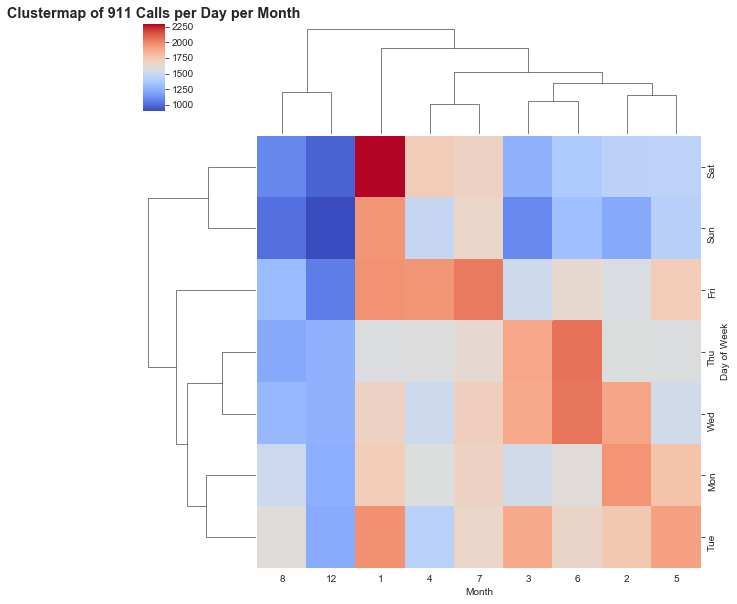

In [78]:
sns.clustermap(dfrearr2,cmap='coolwarm')
plt.title('Clustermap of 911 Calls per Day per Month')